### Step 1: Getting and Setting up the Data

We will start by looking at an example of a data set from scikit-learn. 

#### Data Analysis Packages

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#### Data Visulaization Tools

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') 
%matplotlib inline

#### Load Data Set from Scikit Learn

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [8]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step 2: Visualizing Current Data

#### Distribution of Median Prices of Houses

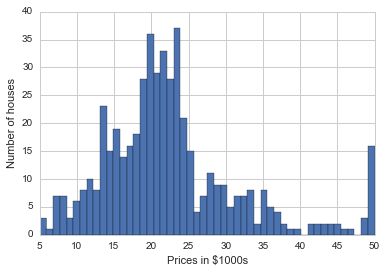

In [9]:
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

#### Scatter Plot of Prices versus Number of Rooms

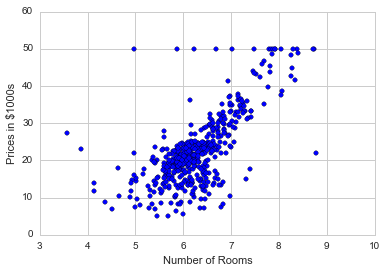

In [11]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Prices in $1000s')
plt.xlabel('Number of Rooms')

#### Transfer data into a Pandas Data Frame

In [12]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
# Lets add the target that is the price of houses
boston_df['Price'] = boston.target

In [14]:
boston_df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'Price'],
      dtype='object')

#### Linear Fit - Price vs. Number of Rooms

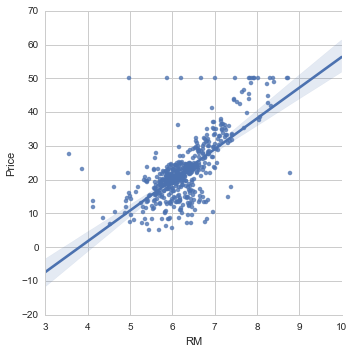

In [17]:
sns.lmplot('RM','Price',data=boston_df)

### Step 3: The Mathematics behind Ordinary Least Square Method

#### General Form

In [ ]:
The general equation of linear regression model would look like the following:

\begin{aligned}
y = X\beta + \epsilon
\end{aligned}

Where X is the design matrix of size n by k (n is the number of attributes/instances and k is the number of features, $\beta$ is a parameter vector of size k by 1, y is the target/label/output vector of size n by 1, and $\epsilon$ is the residual of size n by 1. $\epsilon$ is a white noise (normally distributed with mean 0).

#### Procedure to estimate $\beta$

The error $\epsilon$ can be written as: $$e = y - X\hat\beta$$

the criteria for obtaining our estimates is to find the estimator $\hat\beta$ that minimizes the sum of squared residuals. The sum of squared residuals is given by:

\begin{aligned}
e'e &= (y - X\hat\beta)'(y - X\hat\beta) \\ &= y'y - \hat\beta'X'y - y'X\hat\beta  + \hat\beta'X'X\hat\beta \\ &= y'y - 2\hat\beta X'y + \hat\beta'X'X\hat\beta 
\end{aligned}

Then find the derivative squared residuals w.r.t $\hat\beta$ and set it to zero to find the parameters' estimates. 

$$
\frac{\partial e'e}{\partial\hat\beta} = -2X'y + 2X'X\hat\beta = 0 
$$

Solving for $\hat\beta$, we get:
$$\hat\beta = (X'X)^{-1}X'y$$



#### Properties of the OLS Estimators

* The observed values of X are uncorrelated with the residuals i.e. $X'e = 0$
* The sum of the residuals is zero
* The sample mean of the residuals is zero
* The regression hyperplane passes through the means of the observed values ($\bar X$ and $\bar y$)
* The predicted values of y are uncorrelated with the residuals. $\hat y = X \hat\beta$ Then $y'e = bX'e = b*0 = 0$
* The mean of the predicted Y’s for the sample will equal the mean of the observed Y’s

### Step 4: Using Numpy for a Univariate Linear Regression

In [24]:
# Set up median room values
X = boston_df.RM
X.shape

(506,)

In [21]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [36]:
y = boston_df.Price

In [27]:
# Create the X array in the form [X 1]
X = np.array([[value, 1] for value in X])

In [28]:
X.shape

(506, 2)

In [30]:
X[1:4]

array([[ 6.421,  1.   ],
       [ 7.185,  1.   ],
       [ 6.998,  1.   ]])

In [55]:
# Use numpy lstsq method to estimate the parameters m and b
m, b = np.linalg.lstsq(X, y)[0]
'''Note: m, b [0] are the parameters, [1]: mean squared error, [2]: Rank of matrix of parameters i.e. 
number of parameters, [3]: is the singular (diagonal) values of param vector. Singular values relate to the 
distance between a matrix and the set of singular matrices.'''

# Check the documentation of lstsq method
url = 'http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html'
import webbrowser
webbrowser.open(url)

# Here are some methods used to solve systems of linear equations using numpy
linear_algebra = 'http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html'
webbrowser.open(linear_algebra)

# Another good reference
url1 = 'http://www2.geog.ucl.ac.uk/~mdisney/teaching/GEOGG121/inversion/prac/'

True

In [40]:
m, b

(9.1021089811803062, -34.670620776438561)

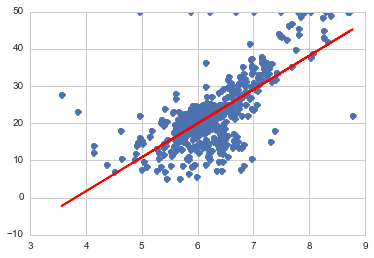

In [43]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, m*x + b, 'r', label = 'Best Fit Line')

In [45]:
# Reference on the theory
ref = 'http://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf'
webbrowser.open(ref)

True

### Step 5: Getting the Error

In [54]:
# Get the resulting array
result = np.linalg.lstsq(X, y)

# Get the total error
error_total = result[1][0]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X))

# Print
print 'The root mean square error is %0.2f' %rmse

The root mean square error is 6.60


With 95% confidence level, house prices are within approximately $13000 off the house pricres.

In [74]:
# Aside: Find the sum of i where i goes from 1 to 20

# Method 1
i = range(1,21)
print sum(i)

# Method 2
n = 0
for i in range(1,21):
    n = n + i
print n

# Now find 20!

# Method 1
num = 1
for i in range(1,21):
    num = i*num
print num

# Method 2: Use the factorial function in math library instead
import math 
print math.factorial(20)

210
210
2432902008176640000
2432902008176640000


### Step 6: Using Scikit Learn to Implement Multivariate Regression

In [75]:
# Now lets use the scikit learn to build the linear regression model
import sklearn
from sklearn.linear_model import LinearRegression

# Documentation
LR = 'http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'
webbrowser.open(LR)

In [76]:
# Create a linear regression object
lreg = LinearRegression()

In [78]:
X_multi = boston_df.drop('Price',1)
y_target = boston_df.Price

In [79]:
lreg.fit(X_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [80]:
print ' The estimated intercept coefficient is %.2f' % lreg.intercept_
print ' The number of coefficients used is %d ' % len(lreg.coef_)

 The estimated intercept coefficient is 36.49
 The number of coefficients used is 13 


In [88]:
# Coefficient data frame of each of the explanatory variable

# First column is the column names of the boston data frame
coeff_df = DataFrame(boston_df.columns)
# Rename it to Features
coeff_df.columns = ['Features']

# 2nd column is the coefficient estimates of the variables
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
# Drop the response variable Price
coeff_df = coeff_df[coeff_df.Features != 'Price']
# Print the coefficient data frame!
coeff_df 

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Step 7: Using Training and Validation

In [89]:
# Set train and test data sets
# Cross validation method
cross = 'http://scikit-learn.org/stable/modules/cross_validation.html'
model_selection = 'http://scikit-learn.org/stable/model_selection.html'
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)

In [90]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(379, 2) (127, 2) (379,) (127,)


### Step 8: Predicting House Prices

In [91]:
lreg = LinearRegression()

# Fit the training data to the linear regression model
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [92]:
# Run a prediction on the training and test data sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print 'Fit a model X_train, and calculate the MSE with y_train: %.2f' % np.mean((y_train - pred_train)**2)
print 'Fit a model X_train, and calculate the MSE with X_test and y_test: %.2f' % np.mean((y_test - pred_test)**2)

Fit a model X_train, and calculate the MSE with y_train: 47.83
Fit a model X_train, and calculate the MSE with X_test and y_test: 31.40


### Step 9: Residual Plot

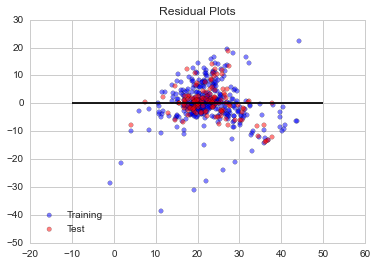

In [97]:
train = plt.scatter(pred_train, (pred_train - y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test - y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=50)
plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')

From the above residual plot, it is clear that linear regression works pretty well for model the data at hand.
There is no trend or pattern in the residuals, thus suggesting that the obseravations are independent and normally
distributed. 